# Neural Network From Scratch

# Download Dataset

In [1]:
#hide
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [2]:
# Using Fastai Library

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path

Path('/home/hassan/.fastai/data/mnist_sample')

# Point to Current Directory This is on Ram

In [5]:
Path.BASE_PATH = path

# Return Number of Counts

In [6]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

In [7]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [8]:
sevens = (path/'train'/'7').ls().sorted()
threes = (path/'train'/'3').ls().sorted()


In [9]:
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

# Differnet methods to see pic

In [10]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [11]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [12]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [13]:
pd.DataFrame(tensor(im3)[4:15,3:22]).style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [14]:
sevens_list = [tensor(Image.open(o)) for o in sevens]
threes_list = [tensor(Image.open(o)) for o in threes]

In [15]:
type(sevens_list), type(sevens_list[0])

(list, torch.Tensor)

<AxesSubplot:>

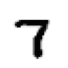

In [16]:
show_image(sevens_list[0])

# Lets Stack as Tensor

In [17]:
sevens_stack = torch.stack(sevens_list).float()/255
threes_stack = torch.stack(threes_list).float()/255

In [18]:
type(sevens_stack)

torch.Tensor

# Compare the types above

In [19]:
type(sevens_list), type(sevens_list[0])

(list, torch.Tensor)

# Put All things Together for Validation

In [20]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

# Prepare Training Data

In [21]:
type([sevens_stack, threes_stack]) ,len([sevens_stack, threes_stack])

(list, 2)

In [22]:
train_x = torch.cat([sevens_stack, threes_stack]).view(-1,28*28)

In [23]:
type(train_x),type(train_x[0]), train_x.shape

(torch.Tensor, torch.Tensor, torch.Size([12396, 784]))

In [24]:
train_y = tensor([0]*len(sevens_stack) + [1]*len(threes_stack)).unsqueeze(1)

In [25]:
#train_y. 

In [26]:
dset = list(zip(train_x,train_y))

In [27]:
x,y = dset[0]

In [28]:
x.shape,y.shape

(torch.Size([784]), torch.Size([1]))

# Prepare Testing Data

In [29]:
valid_x = torch.cat([valid_7_tens ,valid_3_tens]).view(-1,28*28)
valid_y = tensor([0]*len(valid_7_tens )+ [1]* len(valid_3_tens)).unsqueeze(1)
valid_dset=list(zip(valid_x,valid_y))

In [30]:
valid_x.shape,valid_y.shape

(torch.Size([2038, 784]), torch.Size([2038, 1]))

# Data Loaders : Pytorch API

In [31]:
dl = DataLoader(range(15), batch_size=5,shuffle=True)

In [32]:
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [33]:
ds=DataLoader(L(enumerate(string.ascii_lowercase)), batch_size=5, shuffle=True)

In [34]:
list(ds)

[(tensor([17, 18, 10, 22,  8]), ('r', 's', 'k', 'w', 'i')),
 (tensor([14, 20, 15,  9, 13]), ('o', 'u', 'p', 'j', 'n')),
 (tensor([21, 12,  7, 25,  6]), ('v', 'm', 'h', 'z', 'g')),
 (tensor([ 5, 11, 23,  1,  3]), ('f', 'l', 'x', 'b', 'd')),
 (tensor([ 0, 24, 19, 16,  2]), ('a', 'y', 't', 'q', 'c')),
 (tensor([4]), ('e',))]

In [35]:
dl = DataLoader(dset, batch_size=256,shuffle=True)
xb, yb = first(dl)

In [36]:
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [37]:
#iter(dl)
type(valid_dset),len(valid_dset[0])

(list, 2)

In [38]:
valid_dl = DataLoader(valid_dset, batch_size=256,shuffle=True)
v_xb, v_yb = first(valid_dl)

# Initialise Parameters

In [39]:
def init_params(size,std=1.0): return (torch.randn(size)*std).requires_grad_()

In [40]:
weights = init_params((28*28,1))

In [41]:
bias = init_params(1)

# Forward Pass

In [42]:
def linear1(x): return x@weights +bias
    

# Lets see the first Batch

In [43]:
xb, yb = first(dl)

In [44]:
preds = linear1(train_x)

In [45]:
preds=linear1(xb)

In [46]:
yb.shape,train_y.shape

(torch.Size([256, 1]), torch.Size([12396, 1]))

In [47]:
train_y

tensor([[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]])

In [48]:
yb

tensor([[0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],

# Step Function as an Activation

In [49]:
corrects =(preds>0.5).float() == yb

In [50]:
#corrects

In [51]:
corrects.float().mean().item()

0.3203125

# LOSS CALCULATION

In [52]:
def mnist_loss(predictions,targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, (1-predictions), predictions).mean()

In [53]:
loss = mnist_loss(corrects,yb)

# GRADIENT

In [54]:
def calc_grad(x,y,model):
    preds = model(x)
    loss = mnist_loss(preds,y)
    loss.backward()
    

In [55]:
calc_grad(xb,yb,linear1)

In [56]:
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0029), tensor([-0.0199]))

In [57]:
weights.grad.zero_(),bias.grad.zero_();

In [58]:
def train_epoch(model,lr,params):
    for x,y in dl:
        calc_grad(x,y,model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [59]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [60]:
batch_accuracy(linear1(xb), yb)

tensor(0.3242)

In [61]:
def validate_epoch(model):
    accs = [batch_accuracy(model(v_xb), v_yb) for v_xb,v_yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [62]:
validate_epoch(linear1)

0.3109

In [63]:
lr = 1e-1
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.4096

In [64]:
for i in range(400):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.4563 0.4724 0.4789 0.4832 0.4868 0.4882 0.4892 0.4899 0.4911 0.4921 0.4924 0.4919 0.4926 0.4933 0.4941 0.494 0.4945 0.4949 0.4947 0.4953 0.4951 0.4949 0.4951 0.4951 0.4952 0.4955 0.4951 0.4951 0.4951 0.4952 0.4951 0.4948 0.4948 0.4951 0.4955 0.4957 0.4957 0.4955 0.4958 0.4956 0.4957 0.4955 0.4959 0.4958 0.4956 0.496 0.4956 0.4955 0.4956 0.4955 0.4957 0.4953 0.4957 0.4957 0.4959 0.4956 0.4955 0.4958 0.4955 0.4955 0.4955 0.4955 0.4955 0.4954 0.4956 0.4954 0.4956 0.4954 0.4954 0.4957 0.4957 0.4955 0.4954 0.4954 0.4956 0.4955 0.4957 0.4957 0.4957 0.4955 0.4957 0.4956 0.4956 0.4957 0.4956 0.4956 0.4954 0.4957 0.4954 0.4956 0.4957 0.4954 0.4958 0.4957 0.4957 0.4956 0.4956 0.4956 0.4954 0.4956 0.4955 0.4955 0.4956 0.4953 0.4955 0.4957 0.4958 0.4957 0.4953 0.4955 0.4955 0.4957 0.4957 0.4955 0.4956 0.4956 0.4958 0.4957 0.4955 0.4956 0.4957 0.4956 0.4955 0.4955 0.4953 0.4953 0.4954 0.4955 0.4956 0.4956 0.4957 0.4956 0.4956 0.4953 0.4956 0.4957 0.4956 0.4958 0.4953 0.4956 0.4956 0.4956 0.4956 0